# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [126]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [334]:
# Lets see all the classes available
class_names = training_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


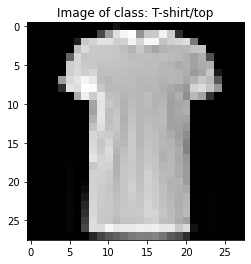

In [335]:
# Lest read a random image from the dataset and draw it
image, label = training_data[17]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {class_names[label]}")
plt.show()

In [336]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

# Task 1:

Create a DataLoader objects for train and test

In [337]:
trainloader = torch.utils.data.DataLoader(training_data, batch_size=100, shuffle=True)
valloader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True)

In [338]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


# Task 2:

Create a Neural Network

In [339]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(784, 196)
        self.fc2 = nn.Linear(196, 128)
        self.fc3 = nn.Linear(128, 10)
    def forward(self, x):
        x = x.reshape(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(self.fc3(x), dim = 1)


model = NN()
print(model)

NN(
  (fc1): Linear(in_features=784, out_features=196, bias=True)
  (fc2): Linear(in_features=196, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


# Task 3:

Specify loss and optimizer

In [340]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Task 3:

Train model using for loop

In [341]:
for epoch in range(10):
    running_loss = 0
    correct_epoch = 0
    for batch, (X, y) in enumerate(trainloader):
        X, y = Variable(X), Variable(y)
        X = X.view(-1, 784)
        
        out = model.forward(X)
        loss = loss_fn(out, y)
        
        _, preds = torch.max(out, dim=1)
      
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        correct_epoch += (preds == y).float().sum()
       
    running_loss = running_loss / len(trainloader)
    acc = correct_epoch / len(training_data)
    print("Epoch: {}".format(epoch+1),
          "Training loss: {}".format(running_loss),
          "Training Accuracy: {:.0f}%".format(100*acc))

Epoch: 1 Training loss: 0.5606488247215747 Training Accuracy: 80%
Epoch: 2 Training loss: 0.38752343468368056 Training Accuracy: 86%
Epoch: 3 Training loss: 0.3475873604416847 Training Accuracy: 87%
Epoch: 4 Training loss: 0.31841019526124 Training Accuracy: 88%
Epoch: 5 Training loss: 0.29947142812112965 Training Accuracy: 89%
Epoch: 6 Training loss: 0.2819151672720909 Training Accuracy: 90%
Epoch: 7 Training loss: 0.26957687497138977 Training Accuracy: 90%
Epoch: 8 Training loss: 0.2571938425550858 Training Accuracy: 90%
Epoch: 9 Training loss: 0.24543533443162838 Training Accuracy: 91%
Epoch: 10 Training loss: 0.236136999775966 Training Accuracy: 91%


# Task 4:

Report accuracy from train set, and test set independently

In [342]:
test_loss = 0
correct = 0
preds_test = torch.tensor([])
vals_test  = torch.tensor([])
with torch.no_grad():
    for X, y in valloader:
        X = X.view(-1, 784)
        out = model.forward(X)
        test_loss += loss_fn(out, y)
        _, preds = torch.max(out, dim=1)
        correct += (preds == y).float().sum()
        preds_test = torch.cat((preds_test, model.forward(X)), 0)
        vals_test  = torch.cat((vals_test , y), 0)

test_loss /= len(valloader)
test_acc = correct / len(test_data)
print("Test loss: {:}".format(test_loss),
          "Test Accuracy: {:.0f}%".format(100*test_acc))

Test loss: 0.3180987536907196 Test Accuracy: 89%


# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

In [343]:
from sklearn.metrics import confusion_matrix
_, preds = torch.max(preds_test, dim=1)
conf_mat = confusion_matrix(vals_test.numpy(), preds.numpy())
print('Confusion matrix')
print(conf_mat)

Confusion matrix
[[827   2  22  38   2   2 100   0   7   0]
 [  1 975   2  18   1   0   2   0   1   0]
 [ 12   1 846  16  62   1  61   0   1   0]
 [ 12   5   9 922  25   0  24   0   3   0]
 [  0   0 107  39 760   0  91   0   3   0]
 [  0   0   0   0   0 974   0  15   0  11]
 [101   2  90  39  52   0 706   0  10   0]
 [  0   0   0   0   0  24   0 932   0  44]
 [  3   1   6   8   5   4   2   5 966   0]
 [  0   0   0   0   0   9   1  32   0 958]]


# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN

In [380]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(784, 10)
    def forward(self, x):
        x = x.reshape(-1, 784)
        return torch.sigmoid(self.linear(x))

In [381]:
log_regression = LogisticRegression()

for epoch in range(10):
    for batch, (X, y) in enumerate(trainloader):
        X, y = Variable(X), Variable(y)
        X = X.view(-1, 784)
      
        log_out = log_regression.forward(X)
        loss = loss_fn(log_out, y)
      
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch: {}".format(epoch+1))

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


In [382]:
log_preds = torch.tensor([])
with torch.no_grad():
    for (X, y) in valloader:
        log_preds = torch.cat((log_preds, log_regression.forward(X)), 0)
        
_, preds = torch.max(log_preds, dim=1)
log_acc = torch.tensor(torch.sum(preds == vals_test).item() / len(preds))    
print("Accuracy of logistic regression {}".format(log_acc))

Accuracy of logistic regression 0.09929999709129333


In [378]:
from sklearn.tree import DecisionTreeClassifier

train_dataset_array = training_data.data.numpy()
train_dataset_array = train_dataset_array.reshape(-1, 784)
training_dataset_labels = training_data.targets.numpy()

test_dataset_array = test_data.data.numpy()
test_dataset_array = test_dataset_array.reshape(-1, 784)
test_dataset_labels = test_data.targets.numpy()

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_dataset_array, training_dataset_labels)

DecisionTreeClassifier()

In [385]:
decision_tree_preds = decision_tree.predict(test_dataset_array)
decision_tree_acc = (decision_tree_preds == test_dataset_labels).sum() / len(decision_tree_preds)
print("Accuracy of decision tree {:.0f}%".format(100*decision_tree_acc))

Accuracy of decision tree 79%
